## 1. Dataset Preprocess

In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
ds = load_dataset("dair-ai/emotion", "unsplit")
data = pd.DataFrame(ds['train'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
data.head(5)

text  label
0  i feel awful about it too because it s my job ...      0
1                              im alone i feel awful      0
2  ive probably mentioned this before but i reall...      1
3           i was feeling a little low few days back      0
4  i beleive that i am much more sensitive to oth...      2

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words_to_remove = {'feel','im','think','know','wa','one','time','thing','people','still','really','feeling'} # from word cloud

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    words_lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in words]
    words = [word for word in words if word not in stop_words and word not in words_to_remove]

    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)
description = data.describe()
print(description)

               label
count  416809.000000
mean        1.554271
std         1.490453
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         5.000000


In [ ]:
# data['length'] = data['text'].apply(len)

In [ ]:
data.head(5)

text  label  \
0  i feel awful about it too because it s my job ...      0   
1                              im alone i feel awful      0   
2  ive probably mentioned this before but i reall...      1   
3           i was feeling a little low few days back      0   
4  i beleive that i am much more sensitive to oth...      2   

                                        cleaned_text  
0              awful job get position succeed happen  
1                                        alone awful  
2  ive probably mentioned proud actually keeping ...  
3                                little low day back  
4          beleive much sensitive tend compassionate

In [ ]:
# data.to_csv('emotiondata.csv', index=False, encoding='utf-8-sig')

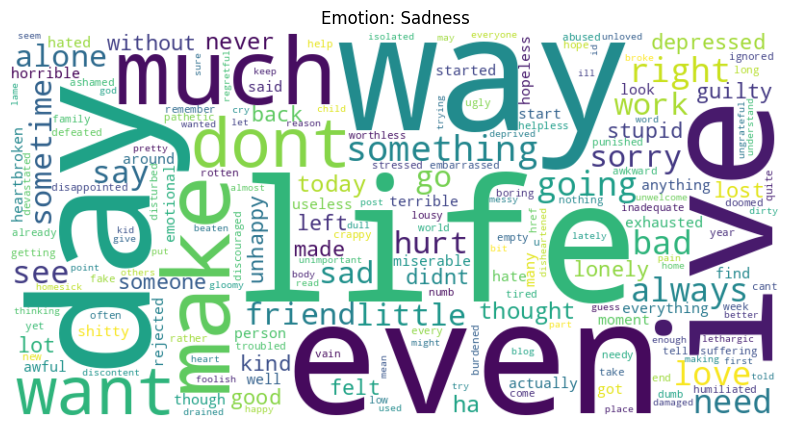

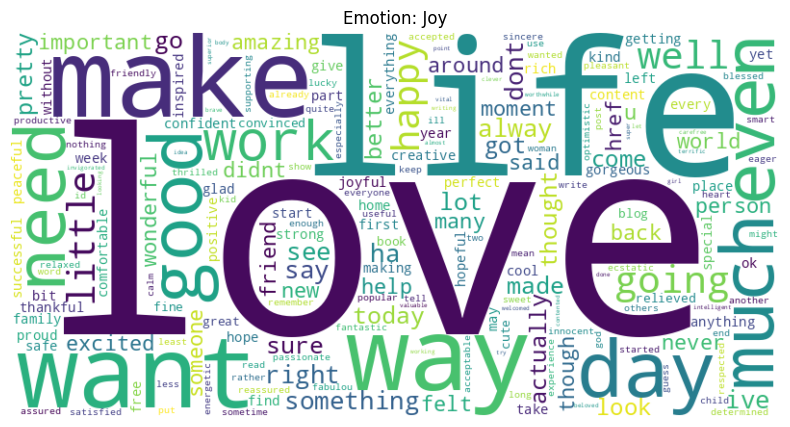

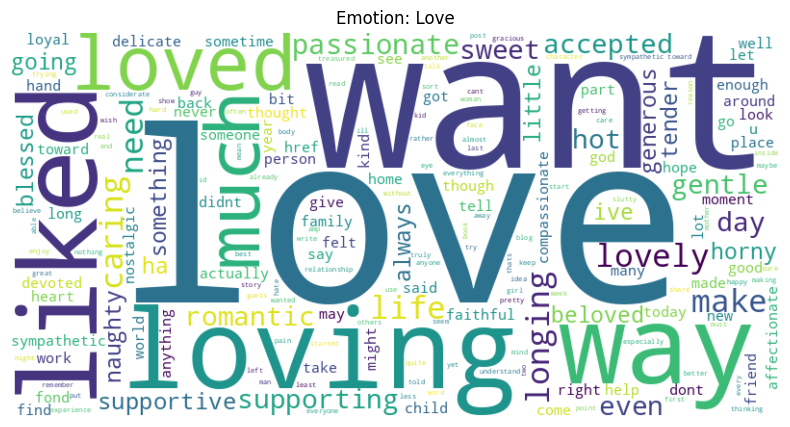

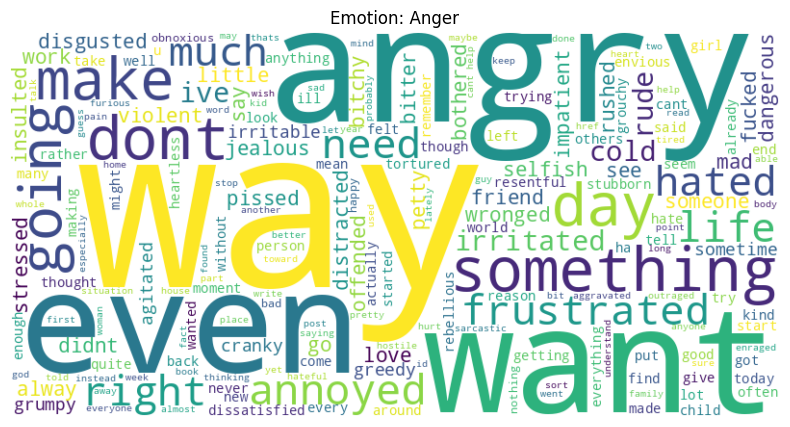

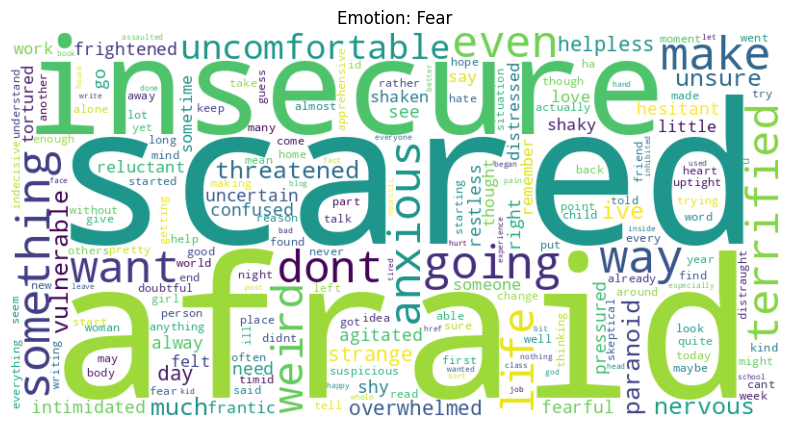

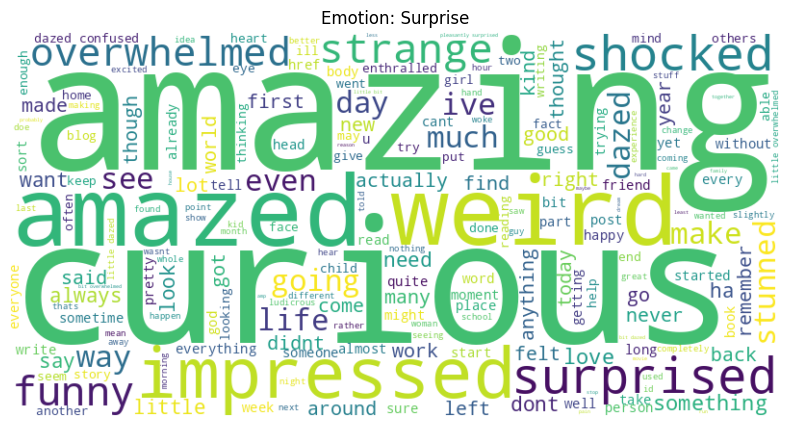

In [ ]:
emotion_labels = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

for emotion, label in emotion_labels.items():
    texts = [data['cleaned_text'][i] for i in range(len(data['label'])) if data['label'][i] == emotion]

    all_text = ' '.join(texts)

    if all_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Emotion: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No text available for emotion '{label}'")

sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)


## 2. Main function: train all candidates

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import nltk
#data = pd.read_csv('/content/emotiondata.csv')

In [ ]:
# 卸载现有的 torch 和 torchtext
!pip uninstall -y torch torchtext

# 安装兼容的版本（例如，PyTorch 2.0.1 和 TorchText 0.15.2）
!pip install torch==2.0.1 torchtext==0.15.2


Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Successfully uninstalled torchtext-0.15.2
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl.metadata (7.4 kB)
Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Train size: 250085
Test size: 166724

Using Regexp tokenizer...

Training MLP with Regexp tokenizer...
Epoch 1/5, Loss: 0.7703
Epoch 2/5, Loss: 0.2479
Epoch 3/5, Loss: 0.2132
Epoch 4/5, Loss: 0.1976
Epoch 5/5, Loss: 0.1885
MLP with Regexp tokenizer Results:
  Accuracy: 0.8968
  Precision: 0.8968
  Recall: 0.8968
  F1-Score: 0.8967
  Time (s): 94.95

Training CNN with Regexp tokenizer...
Epoch 1/5, Loss: 0.4064
Epoch 2/5, Loss: 0.1917
Epoch 3/5, Loss: 0.1726
Epoch 4/5, Loss: 0.1600
Epoch 5/5, Loss: 0.1480
CNN with Regexp tokenizer Results:
  Accuracy: 0.9024
  Precision: 0.9026
  Recall: 0.9024
  F1-Score: 0.9008
  Time (s): 105.61

Training LSTM with Regexp tokenizer...
Epoch 1/5, Loss: 0.6419
Epoch 2/5, Loss: 0.1866
Epoch 3/5, Loss: 0.1515
Epoch 4/5, Loss: 0.1322
Epoch 5/5, Loss: 0.1172
LSTM with Regexp tokenizer Results:
  Accuracy: 0.9145
  Precision: 0.9149
  Recall: 0.9145
  F1-Score: 0.9125
  Time (s): 121.69

Training GRU with Regexp tokenizer...
Epoch 1/5, Loss: 0.3879
Epoch 2/

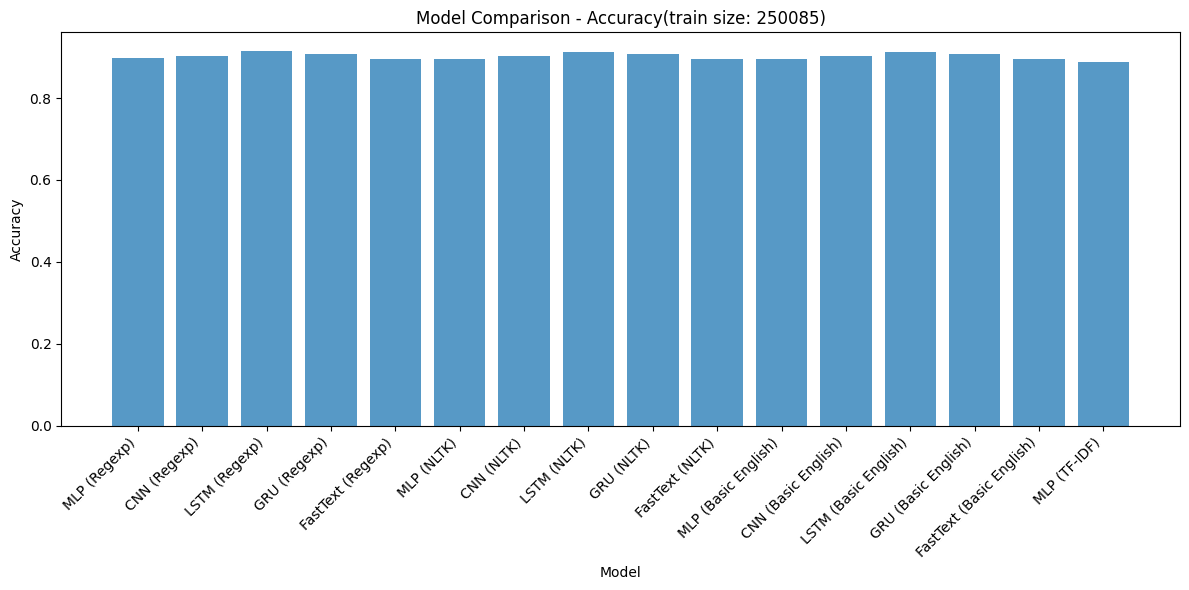

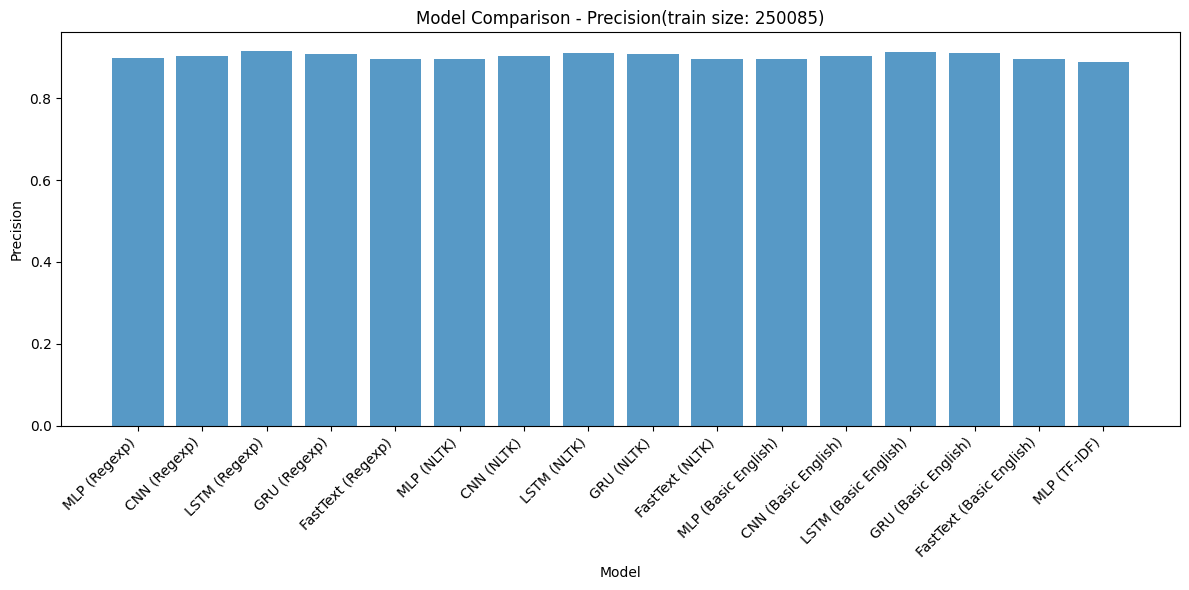

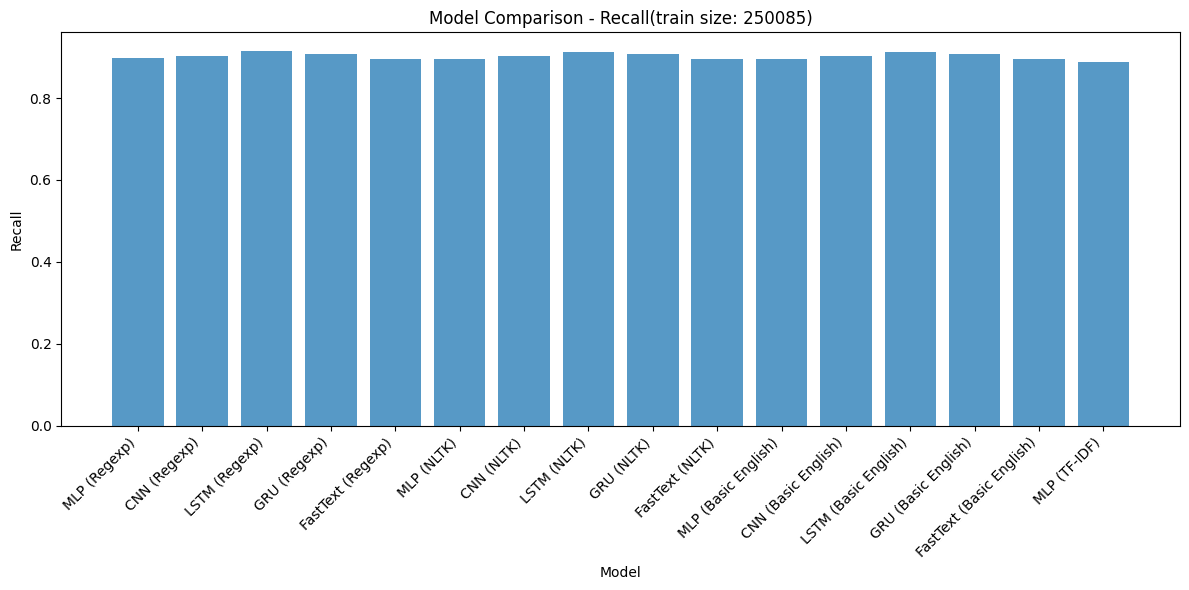

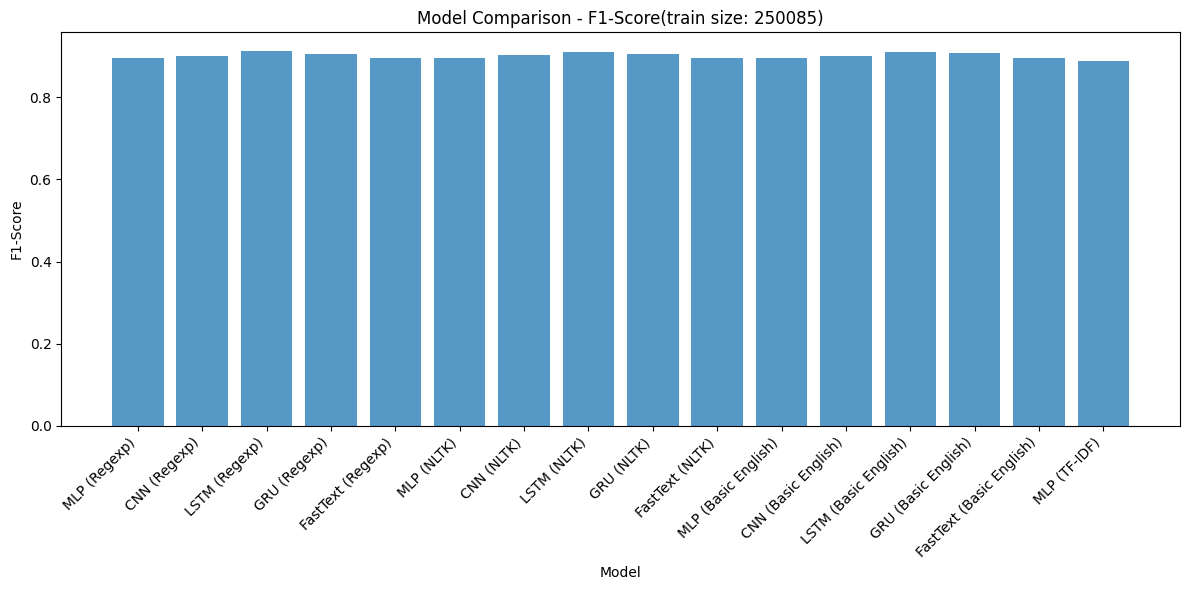

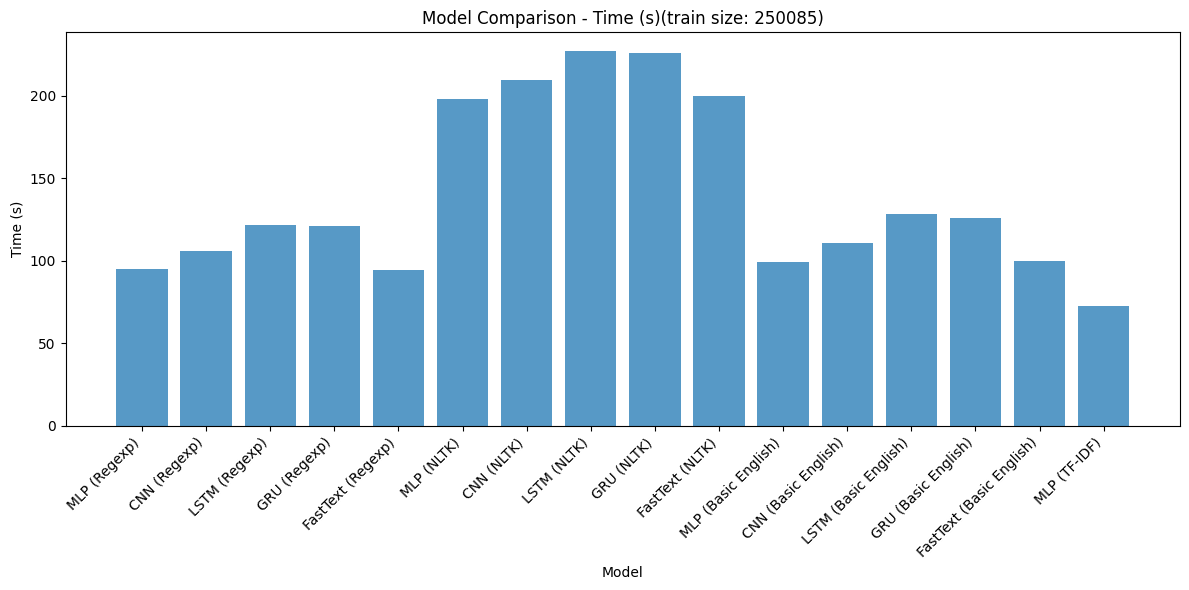


Final Results:
                       Model  Accuracy  Precision    Recall  F1-Score  \
0               MLP (Regexp)  0.896764   0.896755  0.896764  0.896733   
1               CNN (Regexp)  0.902420   0.902583  0.902420  0.900814   
2              LSTM (Regexp)  0.914541   0.914883  0.914541  0.912459   
3               GRU (Regexp)  0.908118   0.907525  0.908118  0.906285   
4          FastText (Regexp)  0.896332   0.895791  0.896332  0.895619   
5                 MLP (NLTK)  0.896302   0.896107  0.896302  0.896105   
6                 CNN (NLTK)  0.902528   0.903663  0.902528  0.902757   
7                LSTM (NLTK)  0.911398   0.911301  0.911398  0.910039   
8                 GRU (NLTK)  0.907692   0.906690  0.907692  0.906501   
9            FastText (NLTK)  0.895972   0.896297  0.895972  0.896108   
10       MLP (Basic English)  0.895516   0.894952  0.895516  0.895128   
11       CNN (Basic English)  0.901742   0.902316  0.901742  0.900752   
12      LSTM (Basic English)  0.911

In [14]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

# **Step 2: Load and Preprocess Data**

# Assume your data is loaded into a DataFrame named 'data'
# Replace this with your actual data loading code
# data = pd.read_csv('your_data.csv')

# Sample size
X = data['cleaned_text']
y = data['label']

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

train_size = len(X_train)
test_size = len(X_test)
print(f"Train size: {train_size}")
print(f"Test size: {test_size}")

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. Regexp Tokenizer
tokenizer_regexp = RegexpTokenizer(r'(?u)\b\w\w+\b').tokenize

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'Regexp': tokenizer_regexp,
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}(train size: {train_size})")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)


### Smaller train size (n = 96000)

Train size: 96000
Test size: 64000

Using Regexp tokenizer...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Training MLP with Regexp tokenizer...
Epoch 1/5, Loss: 1.2904
Epoch 2/5, Loss: 0.5337
Epoch 3/5, Loss: 0.2872
Epoch 4/5, Loss: 0.2235
Epoch 5/5, Loss: 0.1938
MLP with Regexp tokenizer Results:
  Accuracy: 0.8968
  Precision: 0.8961
  Recall: 0.8968
  F1-Score: 0.8959
  Time (s): 36.02

Training CNN with Regexp tokenizer...
Epoch 1/5, Loss: 0.6518
Epoch 2/5, Loss: 0.2184
Epoch 3/5, Loss: 0.1709
Epoch 4/5, Loss: 0.1412
Epoch 5/5, Loss: 0.1191
CNN with Regexp tokenizer Results:
  Accuracy: 0.8956
  Precision: 0.8963
  Recall: 0.8956
  F1-Score: 0.8957
  Time (s): 39.81

Training LSTM with Regexp tokenizer...
Epoch 1/5, Loss: 1.1545
Epoch 2/5, Loss: 0.3360
Epoch 3/5, Loss: 0.2024
Epoch 4/5, Loss: 0.1595
Epoch 5/5, Loss: 0.1333
LSTM with Regexp tokenizer Results:
  Accuracy: 0.9059
  Precision: 0.9056
  Recall: 0.9059
  F1-Score: 0.9046
  Time (s): 45.75

Training GRU with Regexp tokenizer...
Epoch 1/5, Loss: 0.7174
Epoch 2/5, Loss: 0.2010
Epoch 3/5, Loss: 0.1526
Epoch 4/5, Loss: 0.1235
Ep

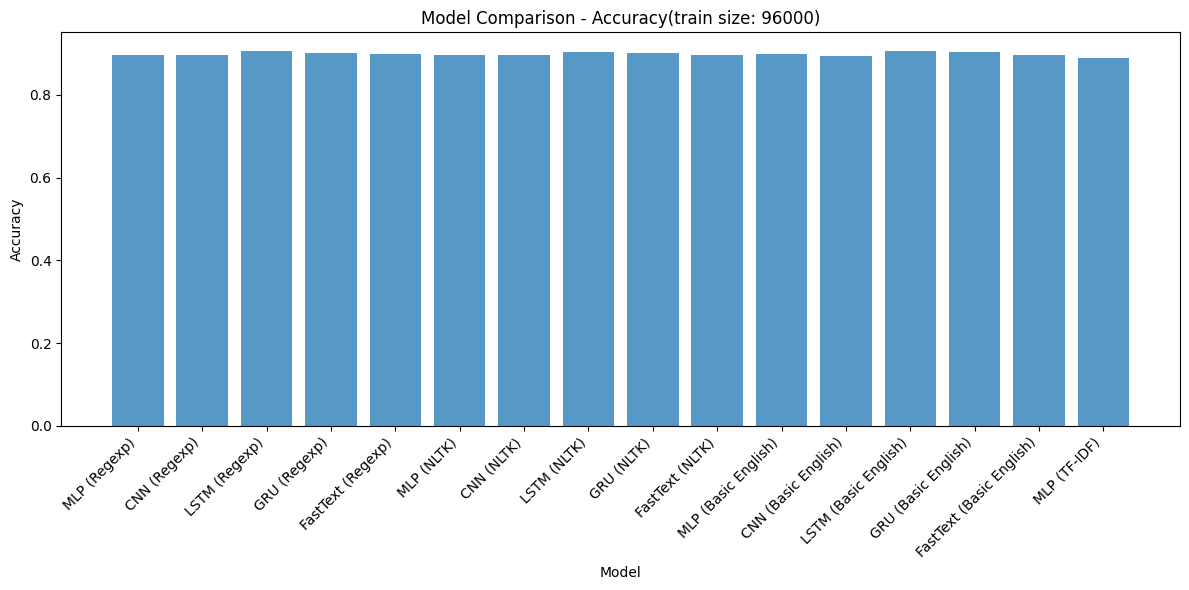

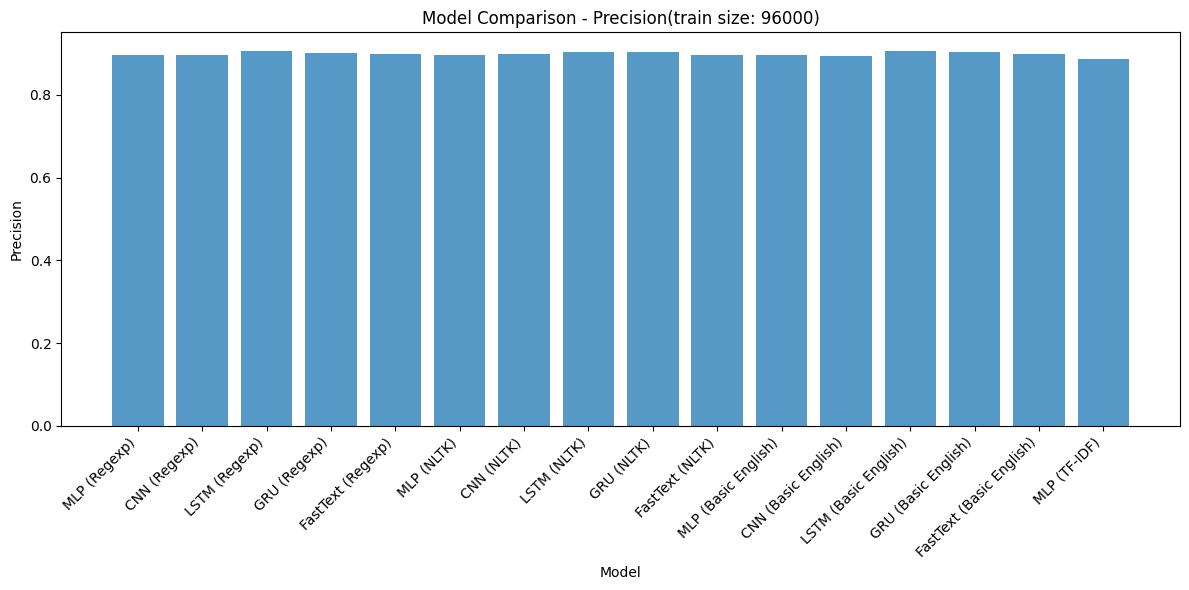

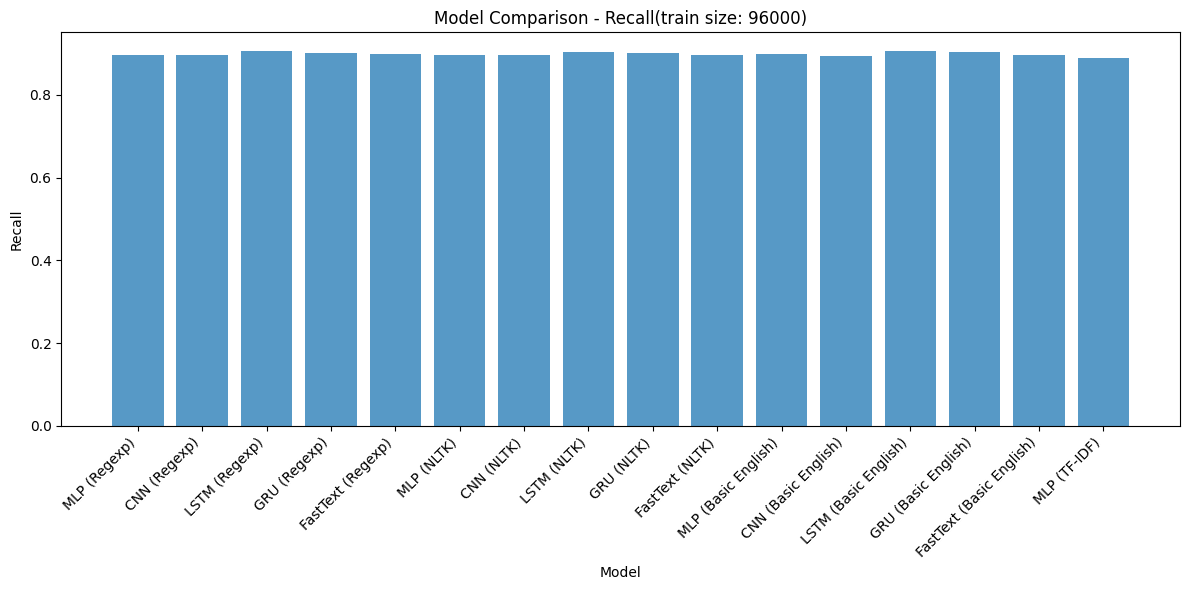

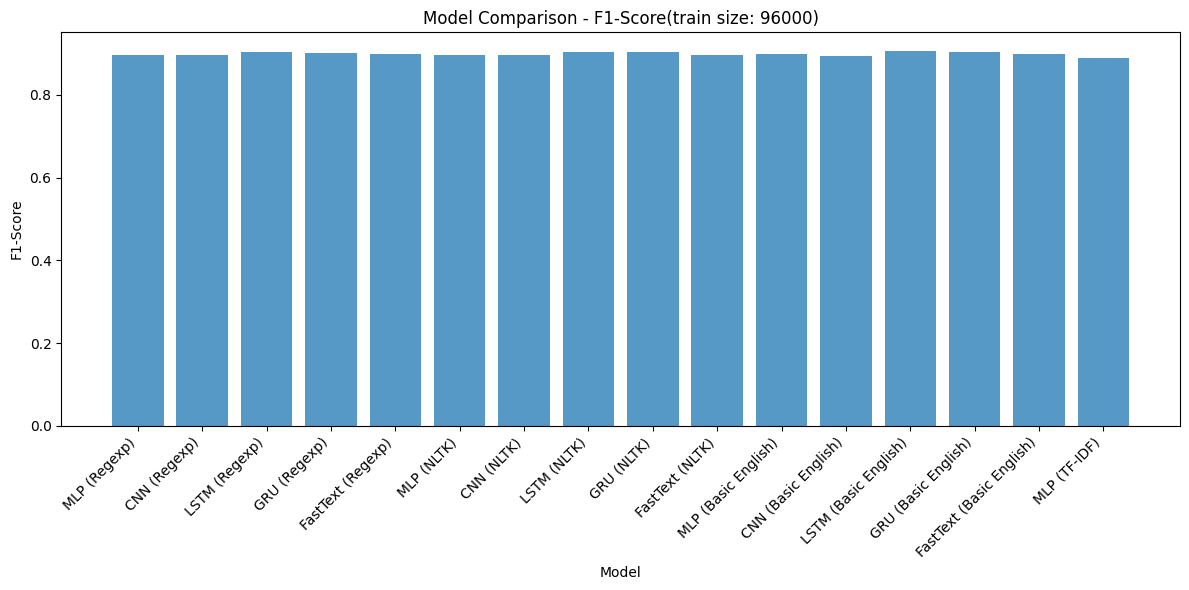

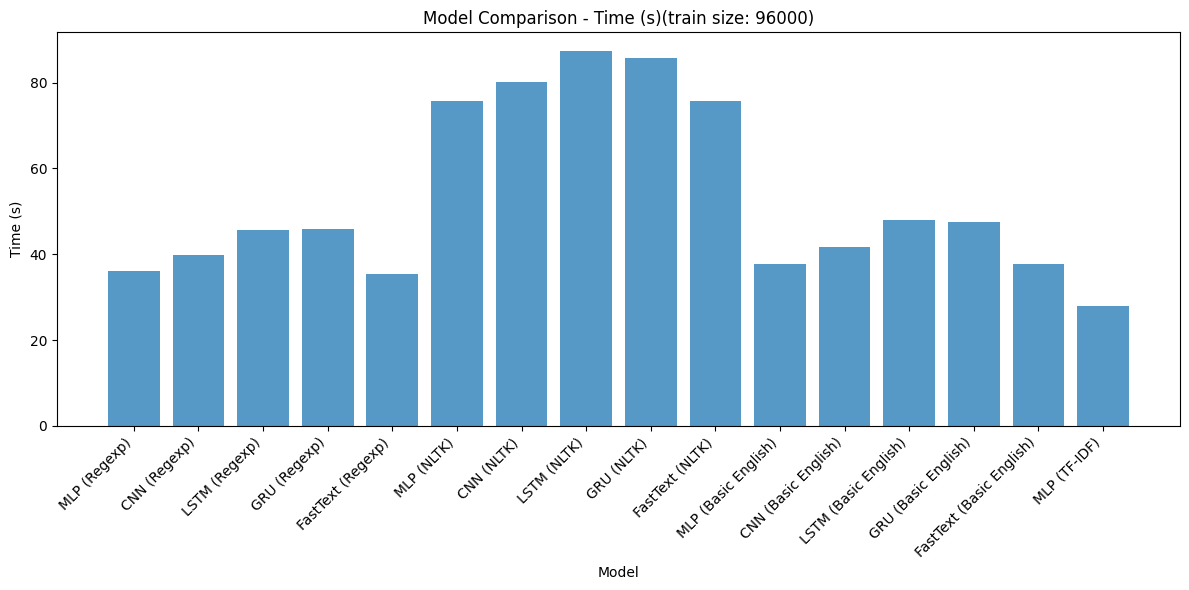


Final Results:
                       Model  Accuracy  Precision    Recall  F1-Score  \
0               MLP (Regexp)  0.896844   0.896072  0.896844  0.895906   
1               CNN (Regexp)  0.895578   0.896275  0.895578  0.895680   
2              LSTM (Regexp)  0.905859   0.905560  0.905859  0.904574   
3               GRU (Regexp)  0.902500   0.902194  0.902500  0.902195   
4          FastText (Regexp)  0.898422   0.898294  0.898422  0.898283   
5                 MLP (NLTK)  0.896734   0.896072  0.896734  0.896218   
6                 CNN (NLTK)  0.896109   0.898195  0.896109  0.896534   
7                LSTM (NLTK)  0.904422   0.904272  0.904422  0.902664   
8                 GRU (NLTK)  0.902016   0.902892  0.902016  0.902382   
9            FastText (NLTK)  0.897000   0.897200  0.897000  0.896952   
10       MLP (Basic English)  0.898328   0.897411  0.898328  0.897660   
11       CNN (Basic English)  0.895125   0.894420  0.895125  0.894616   
12      LSTM (Basic English)  0.906

In [15]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

# **Step 2: Load and Preprocess Data**


# Sample size
X = data['cleaned_text'][:160000]
y = data['label'][:160000]

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

train_size = len(X_train)
test_size = len(X_test)
print(f"Train size: {train_size}")
print(f"Test size: {test_size}")

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. Regexp Tokenizer
tokenizer_regexp = RegexpTokenizer(r'(?u)\b\w\w+\b').tokenize

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'Regexp': tokenizer_regexp,
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}(train size: {train_size})")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)


### Smaller size (n = 9600)

Train size: 9600
Test size: 6400

Using Regexp tokenizer...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Training MLP with Regexp tokenizer...
Epoch 1/5, Loss: 1.5988
Epoch 2/5, Loss: 1.5540
Epoch 3/5, Loss: 1.4939
Epoch 4/5, Loss: 1.3981
Epoch 5/5, Loss: 1.2726
MLP with Regexp tokenizer Results:
  Accuracy: 0.5605
  Precision: 0.5700
  Recall: 0.5605
  F1-Score: 0.4447
  Time (s): 3.43

Training CNN with Regexp tokenizer...
Epoch 1/5, Loss: 1.5217
Epoch 2/5, Loss: 1.1701
Epoch 3/5, Loss: 0.7469
Epoch 4/5, Loss: 0.4211
Epoch 5/5, Loss: 0.2277
CNN with Regexp tokenizer Results:
  Accuracy: 0.7595
  Precision: 0.7577
  Recall: 0.7595
  F1-Score: 0.7563
  Time (s): 3.85

Training LSTM with Regexp tokenizer...
Epoch 1/5, Loss: 1.5892
Epoch 2/5, Loss: 1.4852
Epoch 3/5, Loss: 1.2712
Epoch 4/5, Loss: 1.1386
Epoch 5/5, Loss: 1.0298
LSTM with Regexp tokenizer Results:
  Accuracy: 0.4625
  Precision: 0.4157
  Recall: 0.4625
  F1-Score: 0.3630
  Time (s): 4.53

Training GRU with Regexp tokenizer...
Epoch 1/5, Loss: 1.5844
Epoch 2/5, Loss: 1.4216
Epoch 3/5, Loss: 1.0827
Epoch 4/5, Loss: 0.6508
Epoch

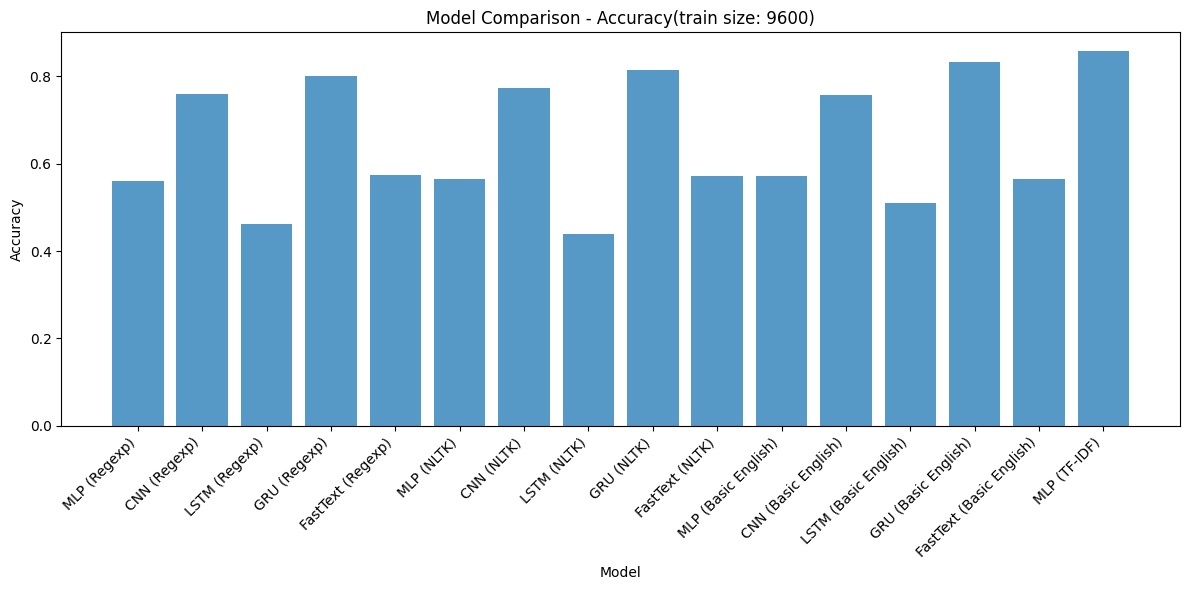

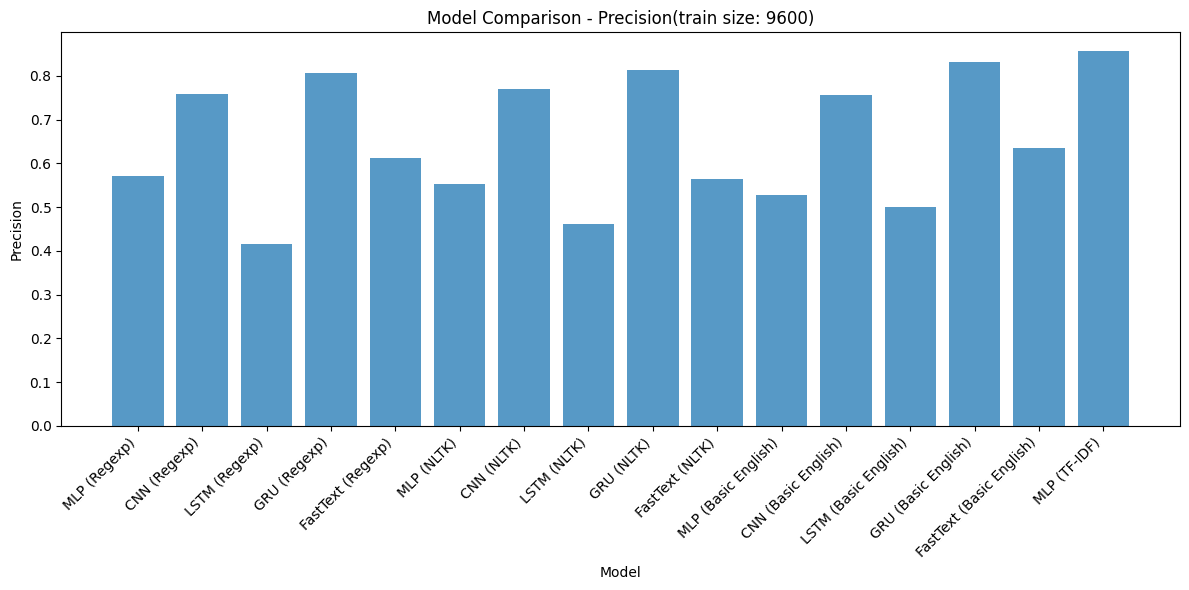

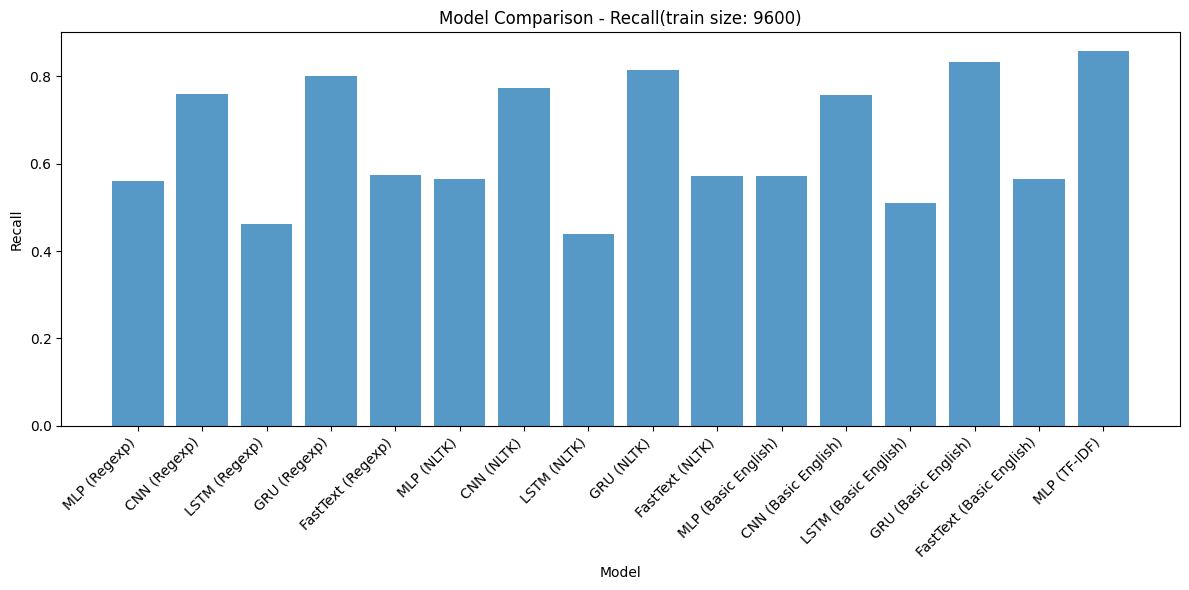

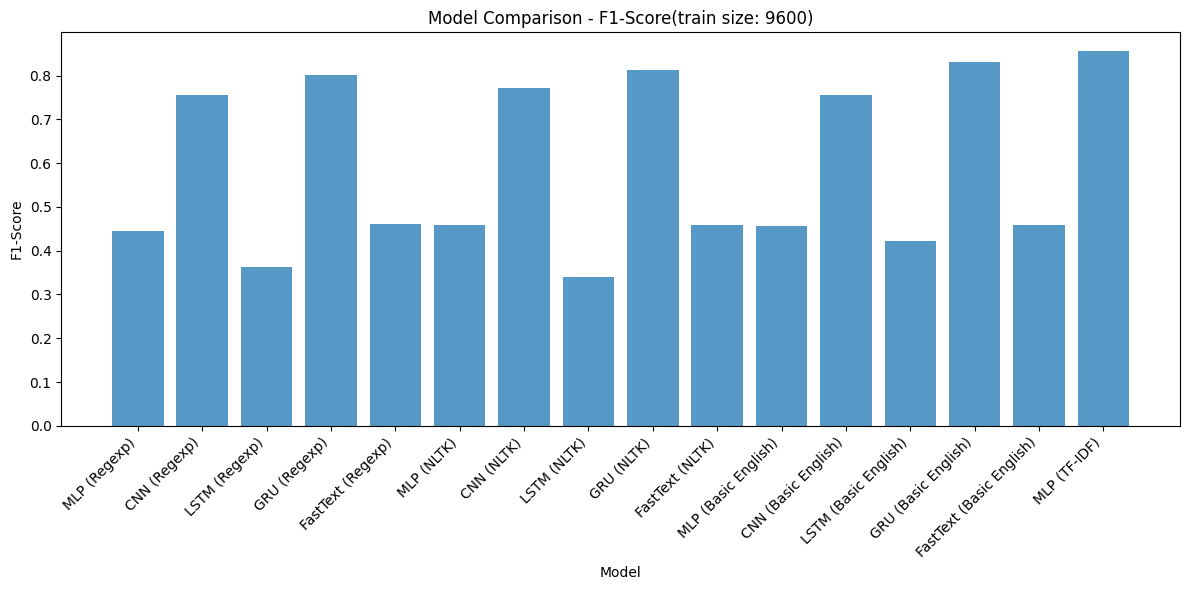

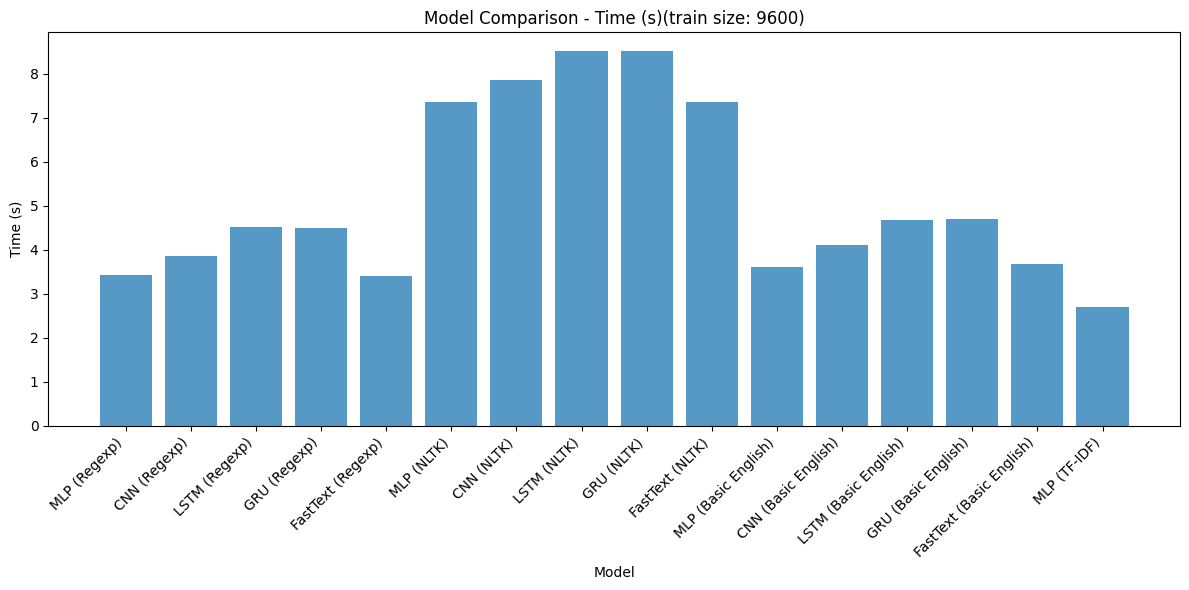


Final Results:
                       Model  Accuracy  Precision    Recall  F1-Score  \
0               MLP (Regexp)  0.560469   0.570028  0.560469  0.444688   
1               CNN (Regexp)  0.759531   0.757740  0.759531  0.756285   
2              LSTM (Regexp)  0.462500   0.415718  0.462500  0.362995   
3               GRU (Regexp)  0.801250   0.806759  0.801250  0.802049   
4          FastText (Regexp)  0.573438   0.612052  0.573438  0.460517   
5                 MLP (NLTK)  0.564688   0.553636  0.564688  0.458380   
6                 CNN (NLTK)  0.774219   0.770050  0.774219  0.770969   
7                LSTM (NLTK)  0.438125   0.461433  0.438125  0.339759   
8                 GRU (NLTK)  0.814375   0.813343  0.814375  0.813288   
9            FastText (NLTK)  0.571875   0.564552  0.571875  0.458683   
10       MLP (Basic English)  0.572812   0.526811  0.572812  0.456055   
11       CNN (Basic English)  0.758437   0.755965  0.758437  0.754468   
12      LSTM (Basic English)  0.509

In [16]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

# **Step 2: Load and Preprocess Data**
# Sample size
X = data['cleaned_text'][:16000]
y = data['label'][:16000]

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

train_size = len(X_train)
test_size = len(X_test)
print(f"Train size: {train_size}")
print(f"Test size: {test_size}")

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. Regexp Tokenizer
tokenizer_regexp = RegexpTokenizer(r'(?u)\b\w\w+\b').tokenize

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'Regexp': tokenizer_regexp,
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}(train size: {train_size})")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)


### n = 960

Train size: 960
Test size: 640

Using Regexp tokenizer...

Training MLP with Regexp tokenizer...
Epoch 1/5, Loss: 1.6638


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 2/5, Loss: 1.6017
Epoch 3/5, Loss: 1.5892
Epoch 4/5, Loss: 1.5838
Epoch 5/5, Loss: 1.5794
MLP with Regexp tokenizer Results:
  Accuracy: 0.3344
  Precision: 0.2055
  Recall: 0.3344
  F1-Score: 0.2391
  Time (s): 0.36

Training CNN with Regexp tokenizer...
Epoch 1/5, Loss: 1.6496
Epoch 2/5, Loss: 1.4371
Epoch 3/5, Loss: 1.2989
Epoch 4/5, Loss: 1.1602
Epoch 5/5, Loss: 1.0071
CNN with Regexp tokenizer Results:
  Accuracy: 0.3875
  Precision: 0.3633
  Recall: 0.3875
  F1-Score: 0.3238
  Time (s): 0.40

Training LSTM with Regexp tokenizer...
Epoch 1/5, Loss: 1.7053
Epoch 2/5, Loss: 1.5899
Epoch 3/5, Loss: 1.5719
Epoch 4/5, Loss: 1.5484
Epoch 5/5, Loss: 1.5066
LSTM with Regexp tokenizer Results:
  Accuracy: 0.3047
  Precision: 0.2490
  Recall: 0.3047
  F1-Score: 0.2062
  Time (s): 0.46

Training GRU with Regexp tokenizer...
Epoch 1/5, Loss: 1.6547
Epoch 2/5, Loss: 1.5740
Epoch 3/5, Loss: 1.5612
Epoch 4/5, Loss: 1.5358
Epoch 5/5, Loss: 1.4915
GRU with Regexp tokenizer Results:
  Accurac

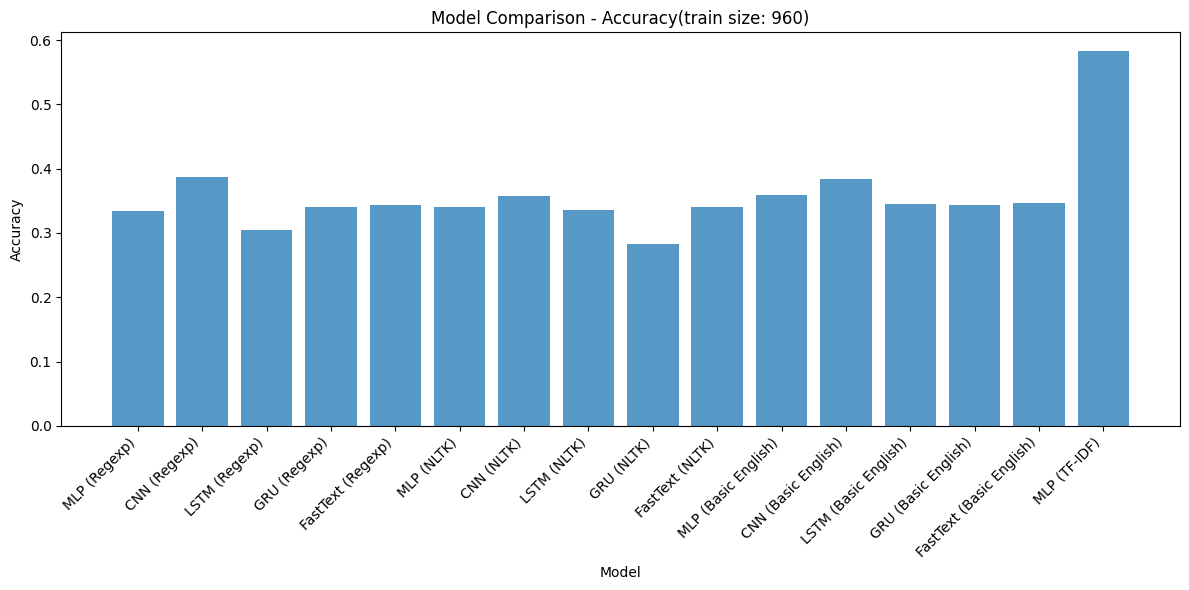

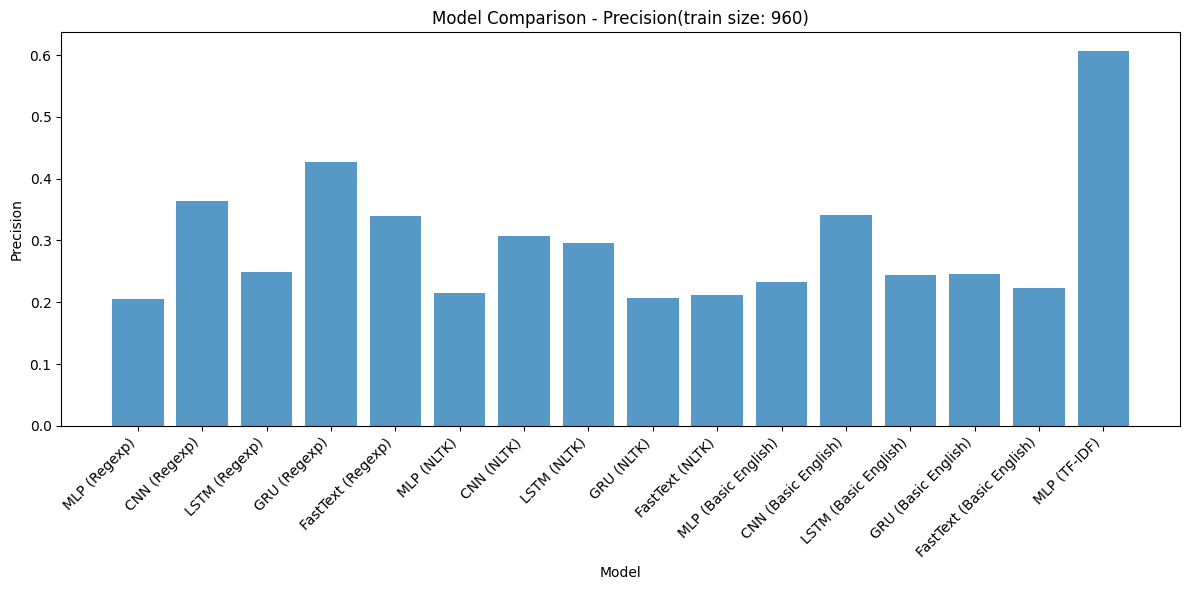

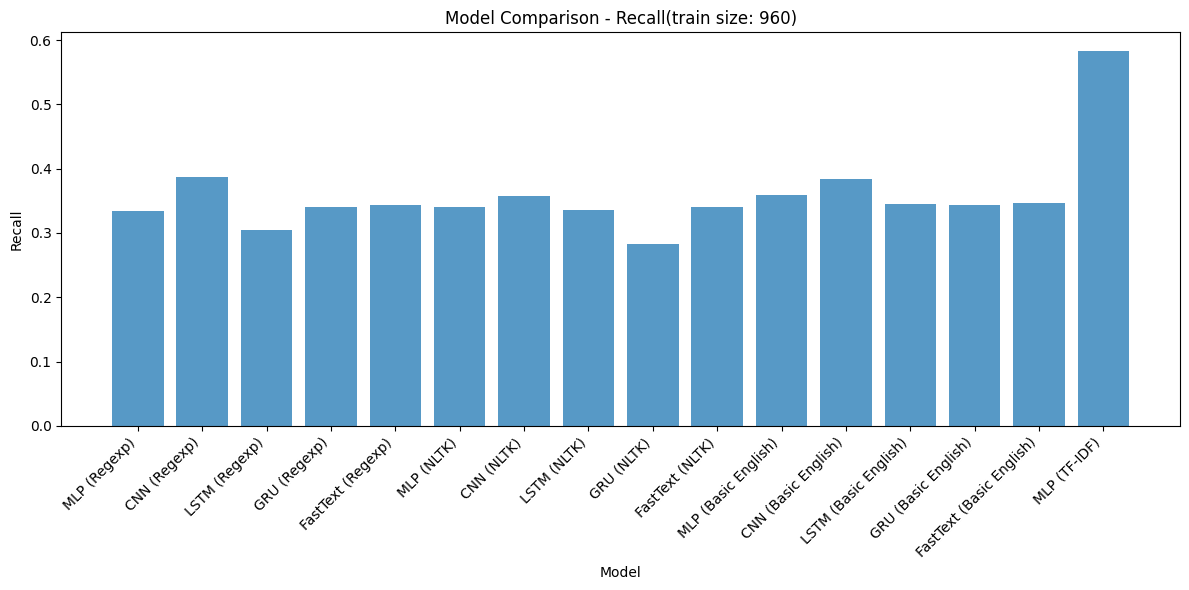

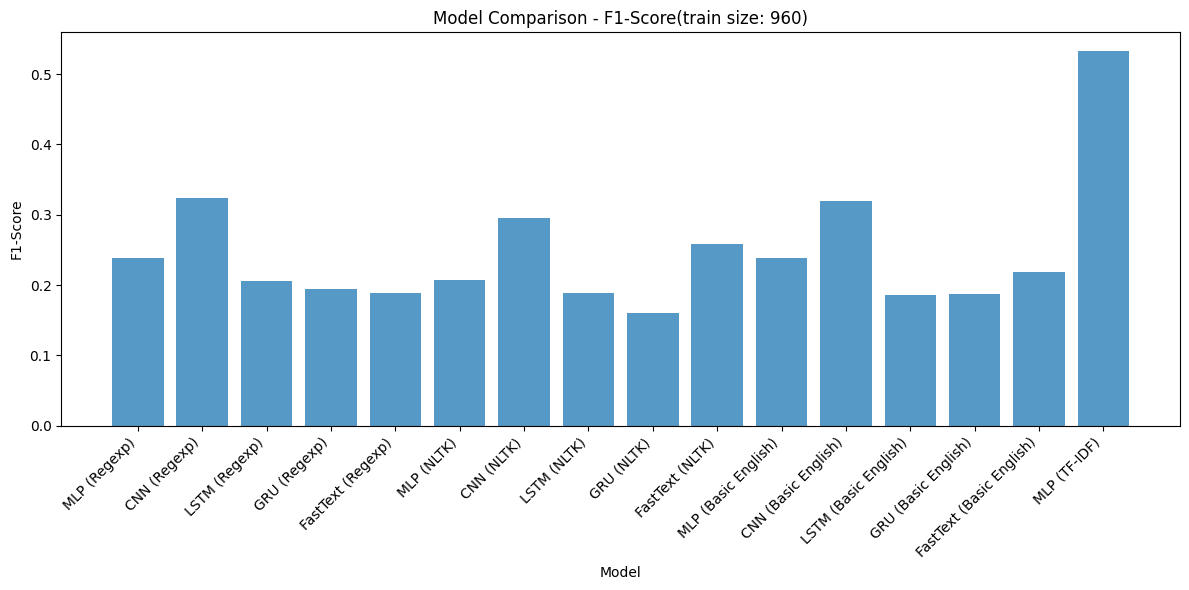

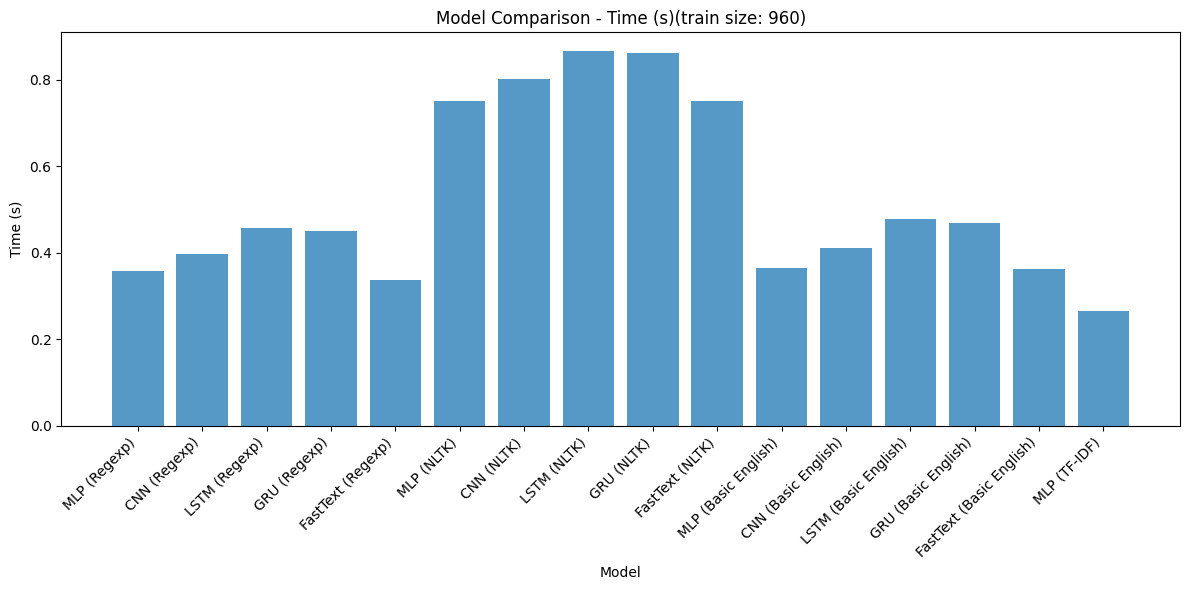


Final Results:
                       Model  Accuracy  Precision    Recall  F1-Score  \
0               MLP (Regexp)  0.334375   0.205484  0.334375  0.239134   
1               CNN (Regexp)  0.387500   0.363307  0.387500  0.323835   
2              LSTM (Regexp)  0.304688   0.249025  0.304688  0.206244   
3               GRU (Regexp)  0.340625   0.427146  0.340625  0.194417   
4          FastText (Regexp)  0.343750   0.340068  0.343750  0.189097   
5                 MLP (NLTK)  0.340625   0.214370  0.340625  0.206627   
6                 CNN (NLTK)  0.357812   0.306499  0.357812  0.295280   
7                LSTM (NLTK)  0.335938   0.295198  0.335938  0.189017   
8                 GRU (NLTK)  0.282813   0.206779  0.282813  0.160635   
9            FastText (NLTK)  0.340625   0.212470  0.340625  0.257748   
10       MLP (Basic English)  0.359375   0.232891  0.359375  0.238453   
11       CNN (Basic English)  0.384375   0.341640  0.384375  0.319751   
12      LSTM (Basic English)  0.345

In [17]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

# **Step 2: Load and Preprocess Data**

# Assume your data is loaded into a DataFrame named 'data'
# Replace this with your actual data loading code
# data = pd.read_csv('your_data.csv')

# Sample size
X = data['cleaned_text'][:1600]
y = data['label'][:1600]

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

train_size = len(X_train)
test_size = len(X_test)
print(f"Train size: {train_size}")
print(f"Test size: {test_size}")

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. Regexp Tokenizer
tokenizer_regexp = RegexpTokenizer(r'(?u)\b\w\w+\b').tokenize

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'Regexp': tokenizer_regexp,
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}(train size: {train_size})")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)


### n = 96

Train size: 96
Test size: 64

Using Regexp tokenizer...

Training MLP with Regexp tokenizer...
Epoch 1/5, Loss: 1.9638
Epoch 2/5, Loss: 1.8855
Epoch 3/5, Loss: 1.8312
Epoch 4/5, Loss: 1.7704
Epoch 5/5, Loss: 1.7156
MLP with Regexp tokenizer Results:
  Accuracy: 0.2969
  Precision: 0.0881
  Recall: 0.2969
  F1-Score: 0.1359
  Time (s): 0.04

Training CNN with Regexp tokenizer...
Epoch 1/5, Loss: 1.7744
Epoch 2/5, Loss: 1.5195
Epoch 3/5, Loss: 1.3432
Epoch 4/5, Loss: 1.2088
Epoch 5/5, Loss: 1.1075
CNN with Regexp tokenizer Results:
  Accuracy: 0.3438
  Precision: 0.2191
  Recall: 0.3438
  F1-Score: 0.2636
  Time (s): 0.04

Training LSTM with Regexp tokenizer...
Epoch 1/5, Loss: 1.8127
Epoch 2/5, Loss: 1.7885
Epoch 3/5, Loss: 1.7608


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 4/5, Loss: 1.7264
Epoch 5/5, Loss: 1.6797
LSTM with Regexp tokenizer Results:
  Accuracy: 0.3750
  Precision: 0.1406
  Recall: 0.3750
  F1-Score: 0.2045
  Time (s): 0.05

Training GRU with Regexp tokenizer...
Epoch 1/5, Loss: 1.7896
Epoch 2/5, Loss: 1.7502
Epoch 3/5, Loss: 1.7122
Epoch 4/5, Loss: 1.6713
Epoch 5/5, Loss: 1.6217
GRU with Regexp tokenizer Results:
  Accuracy: 0.3906
  Precision: 0.4397
  Recall: 0.3906
  F1-Score: 0.2366
  Time (s): 0.05

Training FastText with Regexp tokenizer...
Epoch 1/5, Loss: 1.7846
Epoch 2/5, Loss: 1.7372
Epoch 3/5, Loss: 1.6913
Epoch 4/5, Loss: 1.6565
Epoch 5/5, Loss: 1.6326
FastText with Regexp tokenizer Results:
  Accuracy: 0.3750
  Precision: 0.1406
  Recall: 0.3750
  F1-Score: 0.2045
  Time (s): 0.04

Using NLTK tokenizer...

Training MLP with NLTK tokenizer...
Epoch 1/5, Loss: 1.7858
Epoch 2/5, Loss: 1.7364
Epoch 3/5, Loss: 1.6953
Epoch 4/5, Loss: 1.6690
Epoch 5/5, Loss: 1.6464
MLP with NLTK tokenizer Results:
  Accuracy: 0.3750
  Precis

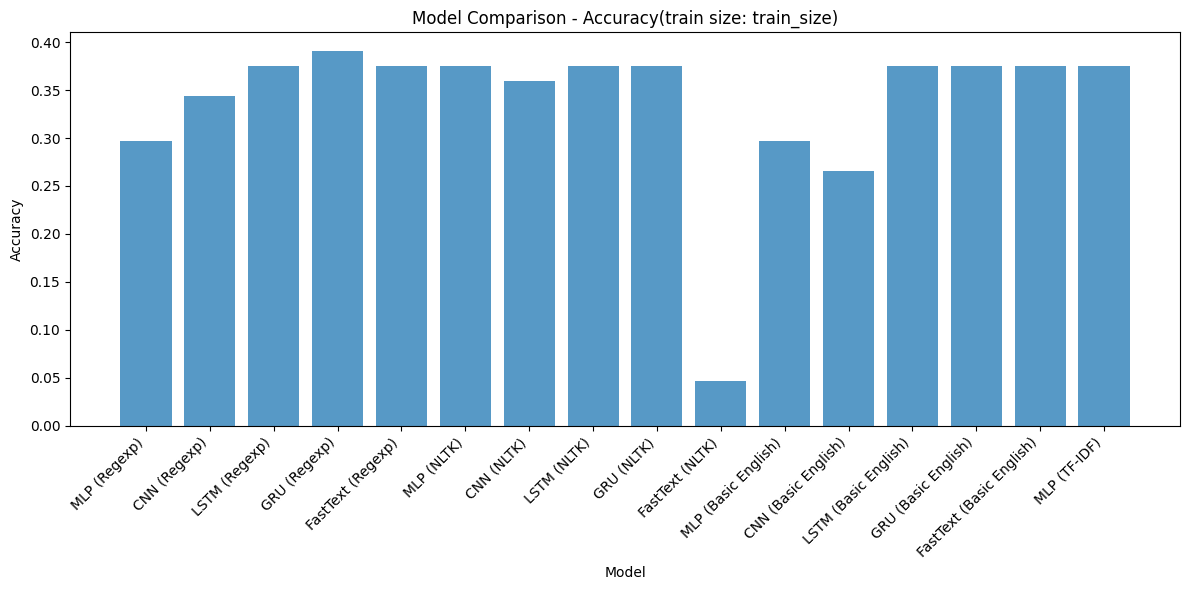

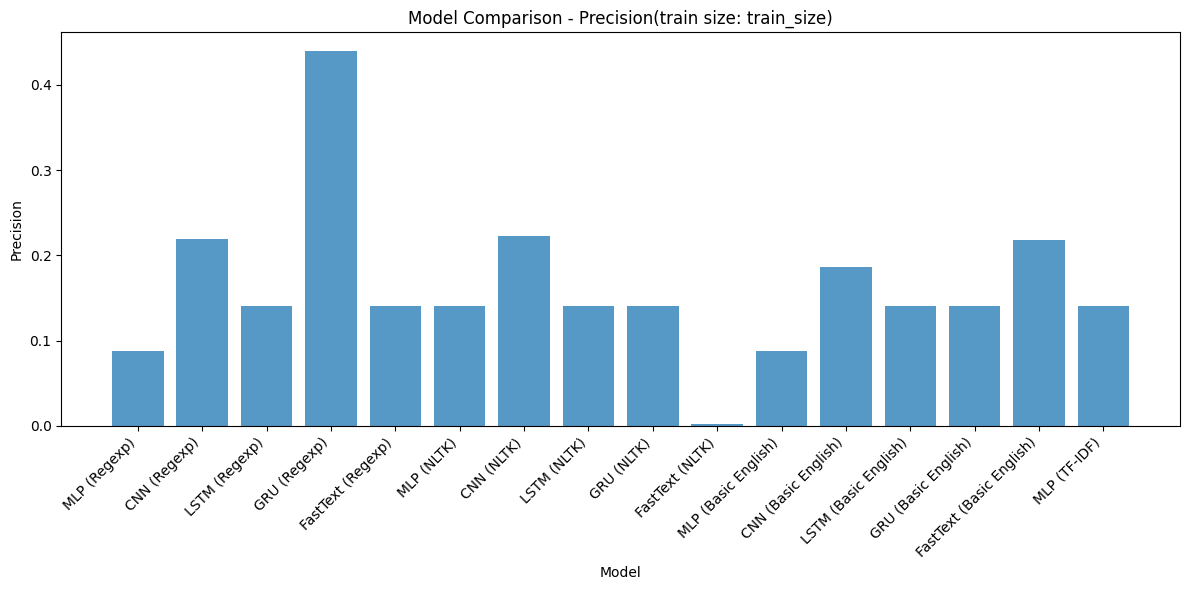

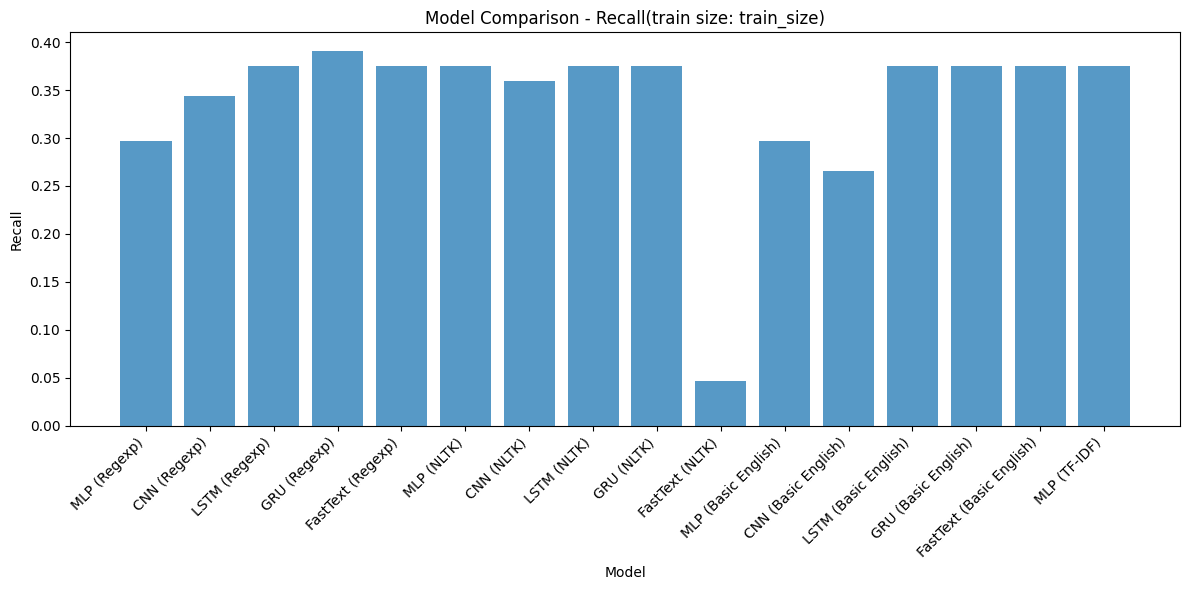

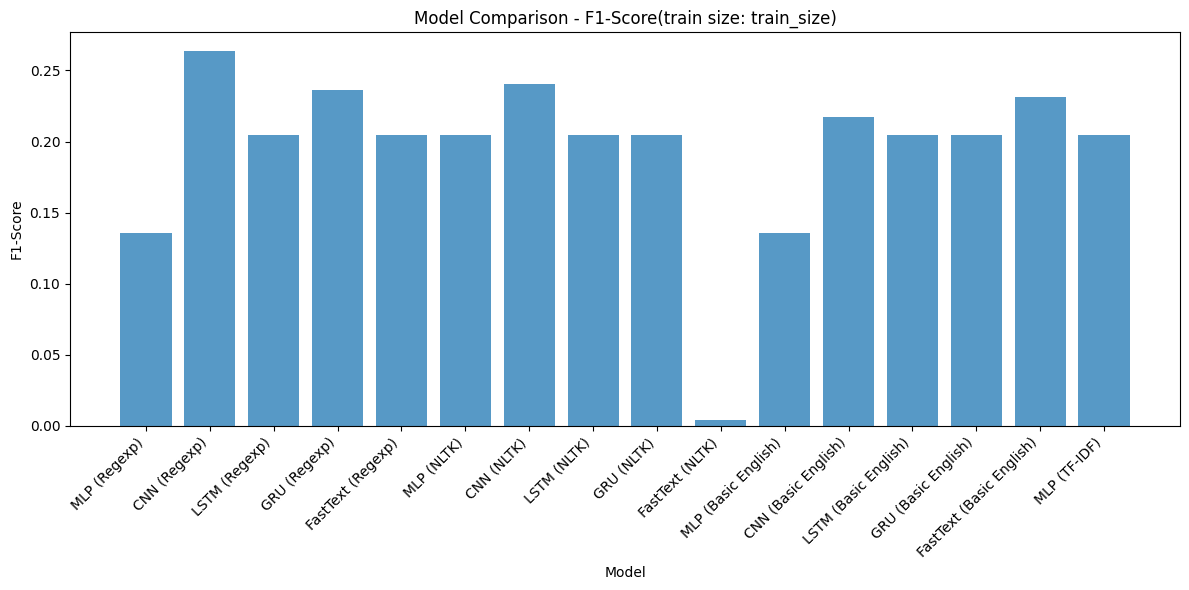

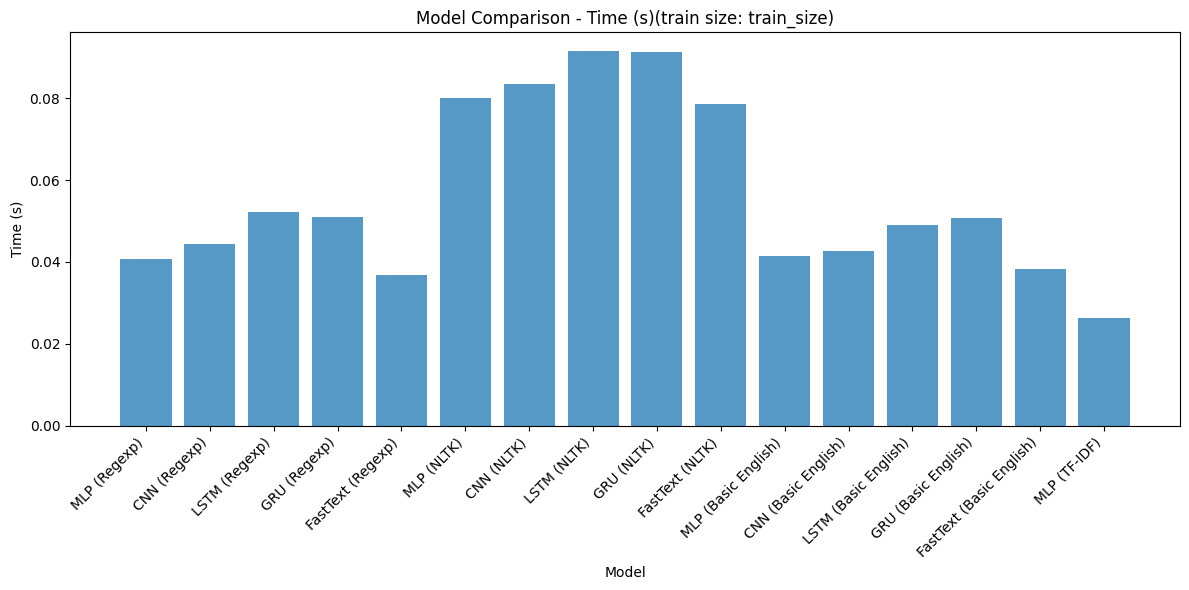


Final Results:
                       Model  Accuracy  Precision    Recall  F1-Score  \
0               MLP (Regexp)  0.296875   0.088135  0.296875  0.135919   
1               CNN (Regexp)  0.343750   0.219105  0.343750  0.263622   
2              LSTM (Regexp)  0.375000   0.140625  0.375000  0.204545   
3               GRU (Regexp)  0.390625   0.439732  0.390625  0.236584   
4          FastText (Regexp)  0.375000   0.140625  0.375000  0.204545   
5                 MLP (NLTK)  0.375000   0.140625  0.375000  0.204545   
6                 CNN (NLTK)  0.359375   0.222979  0.359375  0.240118   
7                LSTM (NLTK)  0.375000   0.140625  0.375000  0.204545   
8                 GRU (NLTK)  0.375000   0.140625  0.375000  0.204545   
9            FastText (NLTK)  0.046875   0.002197  0.046875  0.004198   
10       MLP (Basic English)  0.296875   0.088135  0.296875  0.135919   
11       CNN (Basic English)  0.265625   0.186069  0.265625  0.217076   
12      LSTM (Basic English)  0.375

In [18]:
# **Step 1: Import Necessary Libraries**

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer  # For Basic English Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import time

# **Additional Tokenizers**
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

# **Step 2: Load and Preprocess Data**

# Sample size
X = data['cleaned_text'][:160]
y = data['label'][:160]

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# Handle missing values and ensure data type is string
X_train = X_train.fillna('').astype(str).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.fillna('').astype(str).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

# **Step 3: Define Tokenizers**

# 1. Basic English Tokenizer
tokenizer_basic = get_tokenizer('basic_english')

# 2. NLTK Word Tokenizer
tokenizer_nltk = word_tokenize

# 3. Regexp Tokenizer
tokenizer_regexp = RegexpTokenizer(r'(?u)\b\w\w+\b').tokenize

# **Step 4: Define the Dataset Classes**

# Text Dataset for models that use tokenized inputs
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, vocab_dict):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.text_pipeline = lambda x: [vocab_dict.get(tok, 0) for tok in tokenizer(x)]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.text_pipeline(self.texts[idx]), dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

# TF-IDF Dataset for MLP with TF-IDF features
class TfidfDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# **Step 5: Define the Collate Function**

def collate_batch(batch):
    text_list, label_list = [], []
    for (_text, _label) in batch:
        text_list.append(_text)
        label_list.append(_label)
    text_list = pad_sequence(text_list, batch_first=True, padding_value=0)
    label_list = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_list

# **Step 6: Define Models**

# 1. Multilayer Perceptron (MLP)
class MLPModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(MLPModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# 2. Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.conv = nn.Conv1d(64, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = self.conv(embedded)
        pooled = self.pool(conved).squeeze(2)
        return self.fc(pooled)

# 3. Long Short-Term Memory Network (LSTM)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.lstm = nn.LSTM(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 4. Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size+1, 64, padding_idx=0)
        self.gru = nn.GRU(64, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        _, hidden = self.gru(embedded)
        return self.fc(hidden[-1])

# 5. FastText Model
class FastTextModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super(FastTextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size+1, 64)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, text):
        embedded = self.embedding(text)
        return self.fc(embedded)

# MLP Model for TF-IDF Features
class MLPModel_TFIDF(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLPModel_TFIDF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# **Step 7: Prepare for Multiple Tokenizers**

tokenizers = {
    'Regexp': tokenizer_regexp,
    'NLTK': tokenizer_nltk,
    'Basic English': tokenizer_basic
}

# **Step 8: Initialize Results Dictionary**

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Time (s)": []
}

# **Step 9: Training and Evaluation Loop**

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_classes = len(set(y_train))

for tokenizer_name, tokenizer in tokenizers.items():
    print(f"\nUsing {tokenizer_name} tokenizer...")

    # **Rebuild Vocabulary**
    from collections import Counter
    counter = Counter()
    for text in X_train:
        counter.update(tokenizer(text))
    vocab = sorted(counter, key=counter.get, reverse=True)
    vocab_dict = {word: idx+1 for idx, word in enumerate(vocab)}
    vocab_size = len(vocab_dict)

    # **Create Datasets and DataLoaders**
    train_dataset = TextDataset(X_train, y_train, tokenizer, vocab_dict)
    test_dataset = TextDataset(X_test, y_test, tokenizer, vocab_dict)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

    # **Initialize Models**
    deep_models = {
        "MLP": MLPModel(vocab_size, num_classes),
        "CNN": CNNModel(vocab_size, num_classes),
        "LSTM": LSTMModel(vocab_size, num_classes),
        "GRU": GRUModel(vocab_size, num_classes),
        "FastText": FastTextModel(vocab_size, num_classes),
    }

    for model_name, model in deep_models.items():
        print(f"\nTraining {model_name} with {tokenizer_name} tokenizer...")
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        start_time = time.time()
        epochs = 5
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for text, labels in train_loader:
                text, labels = text.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(text)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        end_time = time.time()

        # **Evaluation**
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for text, labels in test_loader:
                text = text.to(device)
                outputs = model(text)
                _, predicted = torch.max(outputs.data, 1)
                preds.extend(predicted.cpu().numpy())
                trues.extend(labels.numpy())
        accuracy = accuracy_score(trues, preds)
        precision = precision_score(trues, preds, average='weighted', zero_division=0)
        recall = recall_score(trues, preds, average='weighted', zero_division=0)
        f1 = f1_score(trues, preds, average='weighted', zero_division=0)
        elapsed_time = end_time - start_time

        # **Print and Save Results**
        print(f"{model_name} with {tokenizer_name} tokenizer Results:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Time (s): {elapsed_time:.2f}")

        results["Model"].append(f"{model_name} ({tokenizer_name})")
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1-Score"].append(f1)
        results["Time (s)"].append(elapsed_time)

# **Add TF-IDF MLP Model**

print("\nTraining MLP with TF-IDF features...")

# **Generate TF-IDF Features**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create Datasets and DataLoaders for TF-IDF
train_dataset_tfidf = TfidfDataset(X_train_tfidf.toarray(), y_train)
test_dataset_tfidf = TfidfDataset(X_test_tfidf.toarray(), y_test)

train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=batch_size, shuffle=True)
test_loader_tfidf = DataLoader(test_dataset_tfidf, batch_size=batch_size)

# Initialize TF-IDF MLP Model
input_dim = X_train_tfidf.shape[1]
model = MLPModel_TFIDF(input_dim, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
start_time = time.time()
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in train_loader_tfidf:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader_tfidf)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
end_time = time.time()

# **Evaluation**
model.eval()
preds = []
trues = []
with torch.no_grad():
    for features, labels in test_loader_tfidf:
        features = features.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        preds.extend(predicted.cpu().numpy())
        trues.extend(labels.numpy())
accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds, average='weighted', zero_division=0)
recall = recall_score(trues, preds, average='weighted', zero_division=0)
f1 = f1_score(trues, preds, average='weighted', zero_division=0)
elapsed_time = end_time - start_time

# **Print and Save Results**
print(f"MLP with TF-IDF Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Time (s): {elapsed_time:.2f}")

results["Model"].append("MLP (TF-IDF)")
results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)
results["Time (s)"].append(elapsed_time)

# **Step 10: Create Results DataFrame**

results_df = pd.DataFrame(results)

# **Step 11: Generate Bar Charts**

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Time (s)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.75)
    plt.title(f"Model Comparison - {metric}(train size: train_size)")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Step 12: Display Results Table**

print("\nFinal Results:")
print(results_df)
